Dataset loaded for rare word removal
Vocabulary size BEFORE rare word removal: 241588
Vocabulary size AFTER rare word removal: 82202


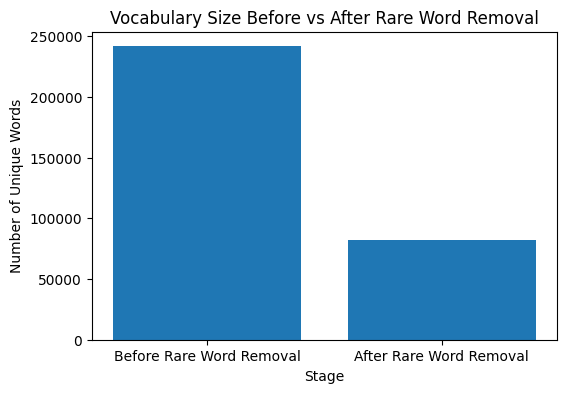

Rare-word-filtered dataset saved as: suicide_detection_rare_word_removed.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


input_file = "suicide_detection_lemmatized.csv"
df = pd.read_csv(input_file)

print("Dataset loaded for rare word removal")

df["text"] = df["text"].astype(str)

all_words = []
for text in df["text"]:
    all_words.extend(text.split())

word_freq = Counter(all_words)

vocab_size_before = len(word_freq)
print("Vocabulary size BEFORE rare word removal:", vocab_size_before)


MIN_FREQ = 2

allowed_words = {word for word, freq in word_freq.items() if freq >= MIN_FREQ}


def remove_rare_words(text):
    return " ".join([word for word in text.split() if word in allowed_words])

df["text"] = df["text"].apply(remove_rare_words)

df = df[df["text"].str.strip() != ""]

filtered_words = []
for text in df["text"]:
    filtered_words.extend(text.split())

vocab_size_after = len(set(filtered_words))
print("Vocabulary size AFTER rare word removal:", vocab_size_after)

plt.figure(figsize=(6,4))
plt.bar(
    ["Before Rare Word Removal", "After Rare Word Removal"],
    [vocab_size_before, vocab_size_after]
)
plt.title("Vocabulary Size Before vs After Rare Word Removal")
plt.ylabel("Number of Unique Words")
plt.xlabel("Stage")
plt.show()


output_file = "suicide_detection_rare_word_removed.csv"
df.to_csv(output_file, index=False)

print("Rare-word-filtered dataset saved as:", output_file)


